# Unsupervised Learning

We'll be working with a dataset I found here: https://www.datascience.com/blog/k-means-clustering

The above source also provides some good explanations of the concepts we'll be working with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, Image

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv')

In [3]:
df.head()

,Driver_ID Distance_Feature Speeding_Feature
0,3423311935\t71.24\t28.0
1,3423313212\t52.53\t25.0
2,3423313724\t64.54\t27.0
3,3423311373\t55.69\t22.0
4,3423310999\t54.58\t25.0


Well, that's annoying. When we pulled this dataset from the internet, it's interpreting the tabs as '\t', making our dataset hard to interpret and impossible for sklearn to use (yet).

However, thanks to Python scripting, as can easily write some code to mutate the dataframe into somehting usable!

In [4]:
print(df['Driver_ID	Distance_Feature	Speeding_Feature'][0])
print(type(df['Driver_ID	Distance_Feature	Speeding_Feature'][0]))

3423311935	71.24	28.0
<class 'str'>


As you can see, the \t shows up as the raw characters above, but show up as tabs when we print the strings outside of pandas.

This is because \t is essentially a special command within a string that tells the computer that we want a tab there. \n is another example of a special substring - that gives us a new line, as demonstrated below.

In [5]:
print('With one backslash: \t, we have a tab')
print('With two backslashes: \\t, we have "\\t"')
print('...')
print('Similarly, "\\n" gives you \na new line')
print('...')
print('Concatenate \\ns for \n\n\n\neven more line breaks')

With one backslash: 	, we have a tab
With two backslashes: \t, we have "\t"
...
Similarly, "\n" gives you 
a new line
...
Concatenate \ns for 



even more line breaks


In [6]:
[x.split('\t') for x in df['Driver_ID	Distance_Feature	Speeding_Feature']][0:5]

[['3423311935', '71.24', '28.0'],
 ['3423313212', '52.53', '25.0'],
 ['3423313724', '64.54', '27.0'],
 ['3423311373', '55.69', '22.0'],
 ['3423310999', '54.58', '25.0']]

In [7]:
cols = np.array([x.split('\t') for x in df['Driver_ID	Distance_Feature	Speeding_Feature']])

In [8]:
df = pd.DataFrame(cols, columns=['Driver_ID', 'Distance_Feature', 'Speeding_Feature'])

In [9]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


This looks good, but...

In [10]:
df.dtypes

Driver_ID           object
Distance_Feature    object
Speeding_Feature    object
dtype: object

In [11]:
print(df['Driver_ID'][0])
print(type(df['Driver_ID'][0]))

3423311935
<class 'str'>


Everything is stored as a string. We can't do ML with this!

This too, however, is easily recitfied:

In [12]:
df['Distance_Feature'] = df['Distance_Feature'].astype(np.float64)
df['Speeding_Feature'] = df['Speeding_Feature'].astype(np.float64)  # For some reason pandas can't convert strings to ints...
                                                                    # ... but it can convert strings to floats...
df['Speeding_Feature'] = df['Speeding_Feature'].astype(int)         # ... and then convert floats to ints

In [13]:
df.dtypes

Driver_ID            object
Distance_Feature    float64
Speeding_Feature      int32
dtype: object

In [14]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


We could have also just used the delimiter keyword (check the documentation!), but the data wrangling was intended to be informative (and fun), also now the dataframe we will be working with is identical to the one used on the Oracle page. 

In [15]:
dft = pd.read_csv('https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv', delimiter='\t')

In [16]:
dft.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [17]:
dft.dtypes

Driver_ID             int64
Distance_Feature    float64
Speeding_Feature    float64
dtype: object

In [18]:
len(set(df['Driver_ID']))           # The Driver_ID is indeed unique to each instance (data point).

4000

In [19]:
df = df.drop('Driver_ID', axis=1)   # Therefore, it (probably) won't be helpful

Now let's plot the data to see what we're dealing with.

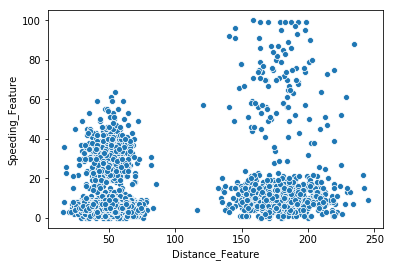

In [20]:
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=df)

## The K-means clustering algorithm

Now we can move on and actually do some machine learning.

In the absense of labels for our data, we are now working on an unsupervised learning problem.

The most well-known algorithm for unsupervised learning is the K-means clusering algorithm. It is nicely described in the following video.

In [21]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA&t=307s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

The silhouette score, roughly speaking, is a measure of dissimilarity within clusters. Values close to 0 indicate  homogeneous clusters; 1, heterogeneous clusters.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score    # We'll use this to evaluate performance

Silhouette score for 2 clusters: 0.8490223286225532
Silhouette score for 3 clusters: 0.8231396834167266
Silhouette score for 4 clusters: 0.5909287904994066
Silhouette score for 5 clusters: 0.5127476940598861
Silhouette score for 6 clusters: 0.48551288051387237
Silhouette score for 7 clusters: 0.4591136881009799
Silhouette score for 8 clusters: 0.44919542756750114
Silhouette score for 9 clusters: 0.4458755063253247
Silhouette score for 10 clusters: 0.4201669142560188


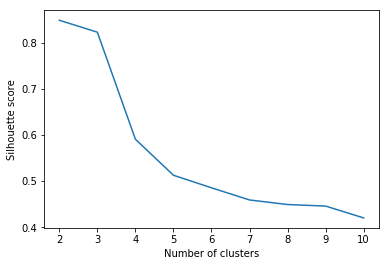

In [23]:
scores = []
for k in range(2, 11):
    clusters = KMeans(n_clusters=k).fit_predict(df)
    score = silhouette_score(df, clusters)
    scores.append(score)
    print('Silhouette score for ' + str(k) + ' clusters: ' + str(score))

plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

It is a standard choice to select the value whose difference in silhouette score with the previous value is greatest (4), or that value after which the silhouette score doesn't fall as fast (the elbow method, gives us 7). Let's try both of these.

In [24]:
clusters = KMeans(n_clusters=4).fit_predict(df)

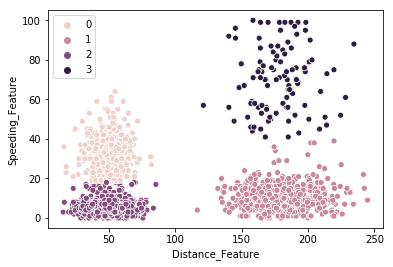

In [25]:
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=df, hue=clusters)

In [26]:
clusters = KMeans(n_clusters=7).fit_predict(df)

If we picked the 'elbow' for K = 7, though, we would have ended up with this:

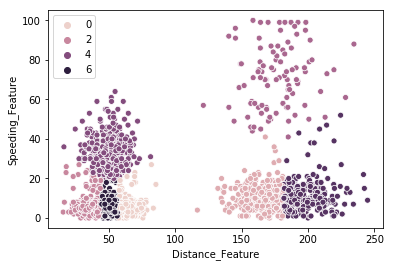

In [27]:
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=df, hue=clusters)